# Maximum Likelihood Estimation

In [31]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import savingfigR as sf
import math as math 
import scipy.optimize as opt

## Binomial Distribution

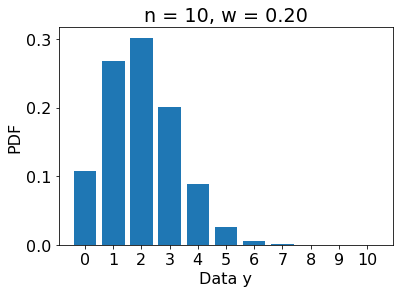

In [20]:
n, w = 10, 0.2
x = np.arange(0, 11, 1)

fig = plt.figure()
plt.bar(x, stats.binom.pmf(x, n, w))
plt.xticks(x)
plt.xlabel('Data y')
plt.ylabel('PDF')
plt.title(f'n = {n:.0f}, w = {w:.2f}')
plt.show()

sf.best_save(fig, 'binom1')

## Binomial Distribution - Varying a Parameter

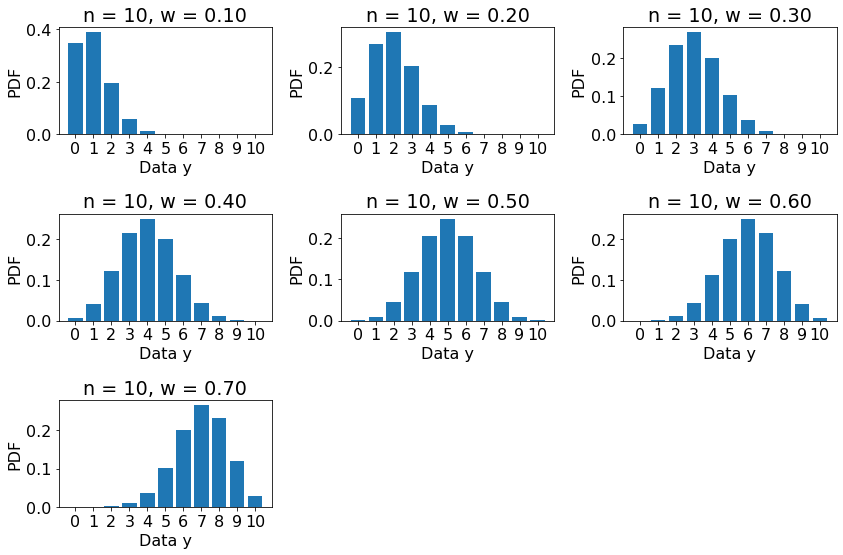

In [25]:
fig = plt.figure(figsize=(12,8))
w = 0.1
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.bar(x, stats.binom.pmf(x, n, w))
    plt.xticks(x)
    plt.xlabel('Data y')
    plt.ylabel('PDF')
    plt.title(f'n = {n:.0f}, w = {w:.2f}')
    w+= 0.1

plt.tight_layout()
plt.show()
sf.best_save(fig, 'binomM')

## Graphing the Likelihood Function 

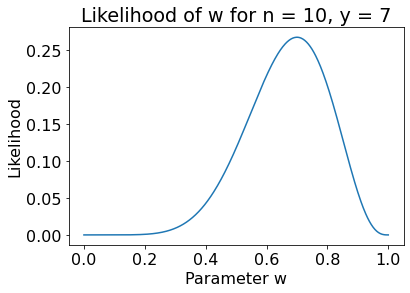

In [28]:
w = np.linspace(0, 1, 500)
likelihood = lambda n, y, w: (math.factorial(n) / (math.factorial(y) * math.factorial(n-y))) * w**y * (1 - w)**(n-y)
like = np.empty_like(w)
for idx, W in enumerate(w): 
    like[idx] = likelihood(n=n, y=7, w=W)

fig = plt.figure()
plt.plot(w, like)
plt.xlabel('Parameter w')
plt.ylabel('Likelihood')
plt.title(f'Likelihood of w for n = {n:.0f}, y = 7')
plt.show()

sf.best_save(fig, 'graphLike')

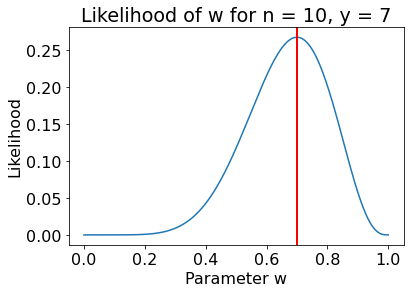

In [29]:
maxLike = np.argmax(like)

fig = plt.figure()
plt.plot(w, like)
plt.axvline(w[maxLike], c='r', lw=2)
plt.xlabel('Parameter w')
plt.ylabel('Likelihood')
plt.title(f'Likelihood of w for n = {n:.0f}, y = 7')
plt.show()

sf.best_save(fig, 'graphLikewmax')

## MLE - BRUTE FORCE

/var/folders/rq/13pc0pfn2h72_3f1f2yxqxfm0000gp/T/ipykernel_26191/3139284825.py:7: RuntimeWarning: divide by zero encountered in log
  neglog[i] = -((np.log(math.factorial(n)/math.factorial(y)*math.factorial(n-y)))+y*np.log(w)+(n-y)*np.log(1-w))


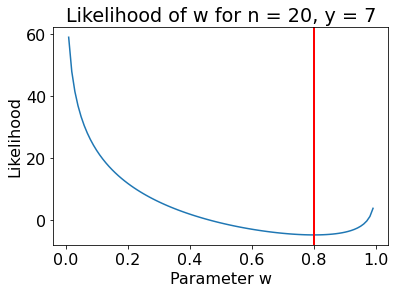

In [30]:
neglog = np.empty(100)
W = np.empty_like(neglog)
n = 20 
y =16
for i in range(len(neglog)):
    w = i*0.01
    neglog[i] = -((np.log(math.factorial(n)/math.factorial(y)*math.factorial(n-y)))+y*np.log(w)+(n-y)*np.log(1-w))
    W[i] = w

minNLL = np.argmin(neglog)
fig = plt.figure()
plt.plot(W, neglog)
plt.axvline(W[minNLL], c='r', lw=2)
plt.xlabel('Parameter w')
plt.ylabel('Likelihood')
plt.title(f'Likelihood of w for n = {n:.0f}, y = 7')
plt.show()

sf.best_save(fig, 'graphLikewmin')

## MLE - OPTIMIZER

In [32]:
def nll(w,n,y):
    NLL = -((np.log(math.factorial(n)/math.factorial(y)*math.factorial(n-y)))+y*np.log(w)+(n-y)*np.log(1-w))
    return NLL

In [34]:
params = opt.fmin(lambda x: nll(x, n=20, y=16), 0.5)
print(params)

Optimization terminated successfully.
         Current function value: -4.833762
         Iterations: 14
         Function evaluations: 28
[0.8]


## Likelihood Ratio Test

In [37]:
1 - stats.chi2.cdf(11.46982, df=1)

0.0007073553142529221